<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork926-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Model Evaluation and Refinement with Tidymodels</h1>

Estimated Time Needed: **45 min**


### Welcome!

We have built models and made predictions of flight delays. Now we will determine how accurate these predictions are. 

You will learn techniques for evaluating the performance of your models. This inludes how to split your dataset into training and testing sets, build and train linear regression models with a training set, compute metrics to assess the performance of models, and tune hyperparameters. Moreover, you‚Äôll also learn a technique for handling cases with small datasets.


## Table of Contents

* [1. Model Evaluation](#evaluation)
* [2. Over-fitting, Under-fitting and Model Selection](#selection)   
* [3. Regularization: Ridge regression, Lasso regression and Elastic Net](#ridge)
* [4. Grid Search](#grid)


## Setup
<p>
Before you can start diving into model evaluation, you first need to load the libraries and data.


<h4>Load Libraries</h4> 

In the previous labs, you used base R's `lm()` to create linear regression models. In this lab, we will introduce another way to create models with **Tidymodels**. 

Tidymodels is a collection of packages that use tidyverse principles to easily do the entire modeling process from preprocessing initial data, to creating a model, to tunning hyperparameters. 

Below, install "tidymodels", additionally "rlang" should be updated in order to properly run "tidymodels". 

**Note**: The installation of "rlang" and "tidymodels" may take a while in the Skill Network Labs. Please give it some time or rerun the cell if you are waiting for more than 10 minutes.


In [1]:
# Install tidymodels if you haven't done so
install.packages("rlang")
install.packages("tidymodels")

After installing the packages, load them. As with the other labs, we will be using "tidyverse" as well.


In [2]:
# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)

‚îÄ‚îÄ Attaching packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidymodels 0.1.0 ‚îÄ‚îÄ
‚úî broom     0.5.6      ‚úî recipes   0.1.12
‚úî dials     0.0.6      ‚úî rsample   0.0.5 
‚úî dplyr     0.8.5      ‚úî tibble    3.0.1 
‚úî ggplot2   3.3.0      ‚úî tune      0.1.0 
‚úî infer     0.5.1      ‚úî workflows 0.1.1 
‚úî parsnip   0.1.0      ‚úî yardstick 0.0.6 
‚úî purrr     0.3.4      
‚îÄ‚îÄ Conflicts ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidymodels_conflicts() ‚îÄ‚îÄ
‚úñ purrr::discard()  masks scales::discard()
‚úñ dplyr::filter()   masks stats::filter()
‚úñ dplyr::lag()      masks stats::lag()
‚úñ ggplot2::margin() masks dials::margin()
‚úñ recipes::step()   masks stats::step()
‚îÄ‚îÄ Attaching packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ t

#### Load Data


As a reminder, you can find the "Airline Data Set" from the following link: <a href="https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz">https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz</a>. 
We will be using the LAX to JFK sample data set throughout this course.
</p>


In [3]:
# url where the data is located
url <- "https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz"

# download the file
download.file(url, destfile = "lax_to_jfk.tar.gz")

# untar the file so we can get the csv only
# if you run this on your local machine, then can remove tar = "internal" 
untar("lax_to_jfk.tar.gz", tar = "internal")

# read_csv only 
sub_airline <- read_csv("lax_to_jfk/lax_to_jfk.csv",
                     col_types = cols('DivDistance' = col_number(), 
                                      'DivArrDelay' = col_number()))

Warning message in untar2(tarfile, files, list, exdir, restore_times):
‚Äúusing pax extended headers‚Äù

<a class="anchor" id="evaluation"></a>
## 1. Model Evaluation
### 1.1 Training and Testing Data

An important step in testing your model is to split your data into training and testing data. The training data will be used to train (fit) models, while the testing data will not be touched until we are evaluating the model.

Using other packages or programming languages may require to separate out the reponse variable (`ArrDelayMinutes` in this case) into another dataframe, but here that is not necessary. The response and predictor variables can all stay in one dataframe.

Before splitting the data we:
* Use the principles learned in module 2 and use `replace_na()` to replace the NAs in the variables we are using to predict. Here, we choose to replace the values with 0 because having NA in these variables mean that there was no delay. 
* Use `select()` to only include the variables we will use to create a final model.


In [5]:
flight_delays <- sub_airline %>% 
    replace_na(list(CarrierDelay = 0,
                    WeatherDelay = 0,
                    NASDelay = 0,
                    SecurityDelay = 0,
                    LateAircraftDelay = 0)) %>%
    select(c(ArrDelayMinutes, DepDelayMinutes, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, DayOfWeek, Month))

Now, with the prepared dataset `flight_delays`, you can split the data. A random seed is set so that the way the data is split will be the same every time this code is run, this helps create reproducible results. 


In [6]:
set.seed(1234)
flight_split <- initial_split(flight_delays)
train_data <- training(flight_split)
test_data <- testing(flight_split)

In `initial_split()`, you can also set the `prop` parameter to set the proportion of the data to use for training. If it is unspecified like here in the example, then by default it is set to 0.75. This means that the proportion of data that is split into the training data is 75% (so the testing data is 25%).


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1):</h1>

<b>Use the function "initial_split" to split up the data set such that 80% of the data samples will be utilized for training. The output of the function should be the following:  "flight_split2", "train_data2" , "test_data2".</b>
</div>


In [7]:
# Write your code below and press Shift+Enter to execute 
set.seed(1234)
flight_split2 <- initial_split(flight_delays)
train_data2 <- training(flight_split2)
test_data2 <- testing(flight_split2)

<details>
    <summary>Click here for the solution.</summary>

```r
flight_split2 <- initial_split(flight_delays, prop = 4/5)  # prop = 0.8 works as well
train_data2 <- training(flight_split2)
test_data2 <- testing(flight_split2)
```

</details>


### 1.2 Training a Model

After splitting the dataset, the next step is to create a Linear Regression object by using `linear_reg()` to specify linear regression and `set_engine()` to specify which package is used to create the model.


In [8]:
# Pick linear regression
lm_spec <- linear_reg() %>%
  # Set engine
  set_engine(engine = "lm")

# Print the linear function
lm_spec

Linear Regression Model Specification (regression)

Computational engine: lm 


In this example, we will use Arrival Delay Minutes ("ArrDelayMinutes") as the response variable and Departure Delay Minutes ("DepDelayMinutes") as the predictor variable to fit (train) a model. We will use `train_data` because we are training the model. The `test_data` will be used later. 

Use `fit()` to fit the model we just specified in `lm_spec`. The output is the fitted (trained) model.


In [9]:
train_fit <- lm_spec %>% 
    fit(ArrDelayMinutes ~ DepDelayMinutes, data = train_data)

train_fit 

parsnip model object

Fit time:  4ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
    (Intercept)  DepDelayMinutes  
         2.3770           0.9648  


To look at some of the predictions of the fitted model, use `predict()`, which will output one column with predictions (`.pred`). Here, since `new_data = train_data`, you are looking at how well the model is predicting the original training data.


In [10]:
train_results <- train_fit %>%
  # Make the predictions and save the predicted values
  predict(new_data = train_data) %>%
  # Create a new column to save the true values
  mutate(truth = train_data$ArrDelayMinutes)

head(train_results)

.pred     truth
1  2.377034 2    
2  2.377034 0    
3  9.130469 0    
4  2.377034 0    
5  2.377034 1    
6 16.848680 7

Additionally, you can use the same fitted model to predict on test data and save to a dataset called `test_results`. There are two columns in the dataset, including both predicted values and true values. 

Now it is time to evaluate the models to estimate how well the models perform on new data, the test data. This example uses the same model in `train_fit` to make the predictions. Again, from `predict()`, the output is stored in a data frame with only one column, called `.pred`. You can then add a new column to this data frame using the `mutate()` function. This new column is named `truth` and contains values of "ArrDelayMinutes" from the `test_data`. In the end, you will have a dataframe with the predictions and the true values.


In [11]:
test_results <- train_fit %>%
  # Make the predictions and save the predicted values
  predict(new_data = test_data) %>%
  # Create a new column to save the true values
  mutate(truth = test_data$ArrDelayMinutes)

head(test_results)

.pred    truth
1 6.236140  0   
2 4.306587  0   
3 2.377034  0   
4 4.306587 25   
5 2.377034  0   
6 2.377034  0

### 1.3 Evaluating the Model

Next, let's evaluate the model. Using metrics learned in previous lessons like RMSE or R$^2$ are good ways to evaluate *regression* models. 

In previous lessons you learned how to claculate RMSE with combinations of functions like `mean()` and `sqrt()`, which is a good exercise. However in practice, this may not be ideal. So more conveniently with "tidymodels", there are already functions like `rmse()` as well as many other metric functions (see https://yardstick.tidymodels.org/reference/index.html).


In [12]:
rmse(train_results, truth = truth,
     estimate = .pred)

.metric .estimator .estimate
1 rmse    standard   14.6296

In [13]:
rmse(test_results, truth = truth,
     estimate = .pred)

.metric .estimator .estimate
1 rmse    standard   12.59509

Using `rsq()`, let's lalculate the R-squared on the training and test data:


In [14]:
rsq(train_results, truth = truth,
    estimate = .pred)

.metric .estimator .estimate
1 rsq     standard   0.845186

In [15]:
rsq(test_results, truth = truth,
    estimate = .pred)

.metric .estimator .estimate
1 rsq     standard   0.8624149

You can also make a plot to visualize how well you predicted¬†the Arrival Delay Minutes. 

This example plots the actual values (the true values of ArrDelayMinutes) versus the model predictions for both the testing and training datasets. It also plots the line y = x through the origin. This line is a visual representation of the perfect model where all predicted values are equal to the true values in the test set. The farther the points are from this line, the worse the model fit.

Let's break down the code below:
1. `mutate` - add column called `train` to test_results and set the values all to "testing"
2. `bind_rows` - do the same to the train_results and bind these rows the test_results
3. `ggplot` - plot the truth vs prediction values
4. `geom_abline` - add the y=x line
5. `geom_point` - add the truth vs prediction points to the plot
6. `facet_wrap` - since `train` contains two values "testing" and "training", this splits the data into two graphs
7. `labs` - add labels


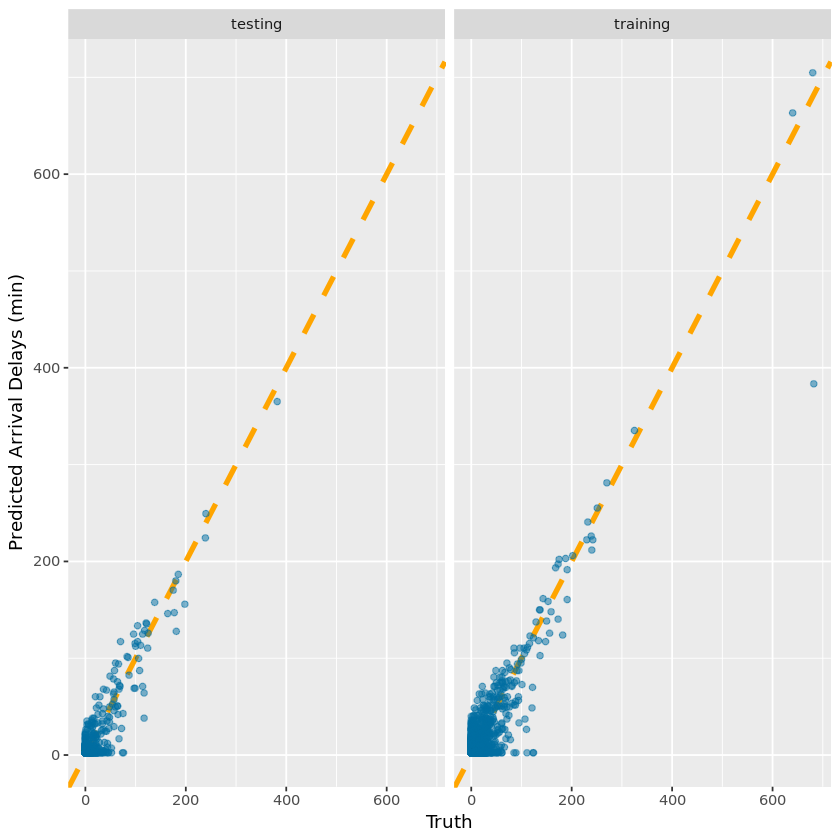

In [16]:
test_results %>%
  mutate(train = "testing") %>%
  bind_rows(train_results %>% mutate(train = "training")) %>%
  ggplot(aes(truth, .pred)) +
  geom_abline(lty = 2, color = "orange", 
              size = 1.5) +
  geom_point(color = '#006EA1', 
             alpha = 0.5) +
  facet_wrap(~train) +
  labs(x = "Truth", 
       y = "Predicted Arrival Delays (min)")

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2): </h1>
<p> 
Using "ArrDelayMinutes" as the response variable and "DepDelayMinutes" as the predictor variable, find the R^2  on the test data using 80% of the data for training data.
</p>
<p>Hint: use train_data2 from question 1. </p>
</div>


In [17]:
# Write your code below and press Shift+Enter to execute 
train_fit2 <- lm_spec %>% 
    fit(ArrDelayMinutes ~ DepDelayMinutes, 
    data = train_data2)
test_results2 <- train_fit2 %>%
  # Make the predictions and save the predicted values
  predict(new_data = test_data2) %>%
  # Create a new column to save the true values
  mutate(truth = test_data2$ArrDelayMinutes)
rsq(test_results2, truth = truth,
    estimate = .pred)

.metric .estimator .estimate
1 rsq     standard   0.8624149

<details>
    <summary>Click here for the solution.</summary>

```r
train_fit2 <- lm_spec %>% 
    fit(ArrDelayMinutes ~ DepDelayMinutes, 
    data = train_data2)
test_results2 <- train_fit2 %>%
  # Make the predictions and save the predicted values
  predict(new_data = test_data2) %>%
  # Create a new column to save the true values
  mutate(truth = test_data2$ArrDelayMinutes)
rsq(test_results2, truth = truth,
    estimate = .pred)
```

</details>


Sometimes you may not have a large enough testing data; as a result, you may want to perform cross validation. Let's  go over several methods that you can use for  cross validation. 


### 1.4 Cross validation


One of the most common ‚Äúout-of-sample‚Äù evaluation techniques is **cross validation**. 

Cross validation is an effective use of data because each observation is used for both training and testing. In cross validation, 
1. First, the dataset is split into k-equal groups; each group is referred to as a fold. 
2. k - 1 of the folds are used to train a model, and the remaining fold is used to test with an evaluation metric. 
3. This is **repeated** until each of the k groups is used as the test set.
4. After all folds are used, there are k evaluation metric results. They are **averaged** to get an estimate of out-of-sample error

For example, in 4-fold cross validation you would use three folds for training and then use one fold for testing. The same model would be trained and then tested 4 times using an evaluation metric. The evaluation metric that you use depends on the model, we will use RMSE and R-squared in our code example.


#### Why is it worth the effort to perform cross validation?

Using cross validation means that a model is trained and evaluated many (k) times, however it is still worth the computational cost because it is used to test the generalizability of the model. Generalizability is a measure of how useful the results of a study are for a broader group of people and situations. As you train a model on the training set, it tends to overfit most of the time. To avoid this situation, you can use regularization techniques. Cross validation provides a check on how the model is performing on a test data (new unseen data), and since you have limited training instances, you need to be careful while reducing the amount of training samples and reserving it for testing purposes.

Moreover, cross validation still works well with a **small amount of data**. For example, assume that you only have 100 samples. If you do a train test with an 80 to 20 percent split, then you only have 20 samples in the test set, which is too small to generalize reliable results. With cross validation, you can have as many as k-folds, so you can build k different models. In this case, you can make predictions on all your data and then average out the model performance.

#### Code Example
To perform cross validation, you can use `vfold_cv()`. Setting `v = 10` means that it will use 10 folds. The function `fit_resamples()` will keep refitting the model specified on the samples specified by the cross validation object.


In [18]:
set.seed(1234)
cv_folds <- vfold_cv(train_data, v = 10)
results <- fit_resamples(lm_spec, 
                         ArrDelayMinutes ~ DepDelayMinutes,
                         resamples = cv_folds)

 We can calculate the **average** RMSE and R-squared of our estimate:


In [19]:
results %>% collect_metrics()

.metric .estimator mean       n  std_err   
1 rmse    standard   14.2800777 10 1.31615657
2 rsq     standard    0.8086263 10 0.03439727

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3): </h1>
<b> 
Calculate the average RMSE and R-squared using three folds utilizing DepDelayMinutes as a feature : 
</b>
</div>


In [20]:
cv_folds_3 <- vfold_cv(train_data, v = 3)
results <- fit_resamples(
    lm_spec, 
    ArrDelayMinutes ~ DepDelayMinutes, 
    resamples = cv_folds_3)
results %>% collect_metrics()

.metric .estimator mean       n std_err    
1 rmse    standard   14.5334247 3 1.857002855
2 rsq     standard    0.8496191 3 0.007734797

<details>
    <summary>Click here for the solution.</summary>

```r
cv_folds_3 <- vfold_cv(train_data, v = 3)
results <- fit_resamples(
    lm_spec, 
    ArrDelayMinutes ~ DepDelayMinutes, 
    resamples = cv_folds_3)
results %>% collect_metrics()
```

</details>


<a class="anchor" id="selection"></a>
## 2. Overfitting, Underfitting and Model Selection

It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world. One reason is **underfitting**. A model that is underfit will have high training and high testing error.

#### How to prevent underfitting?

- Increase the model complexity
- Add more features to the training data 
- Try different models

Let's go over an example of underfitting using a simple dataset included with R called "cars". We will predict the distance (`dist`) it takes for cars to stop using the car's speed (`speed`). 

In this first example model, the model is defined a line set to the mean of the car's stopping distance. Based on the plot, this model is underfitting because of the speeds less than 10 and greater than 20 are very far from the prediction line.


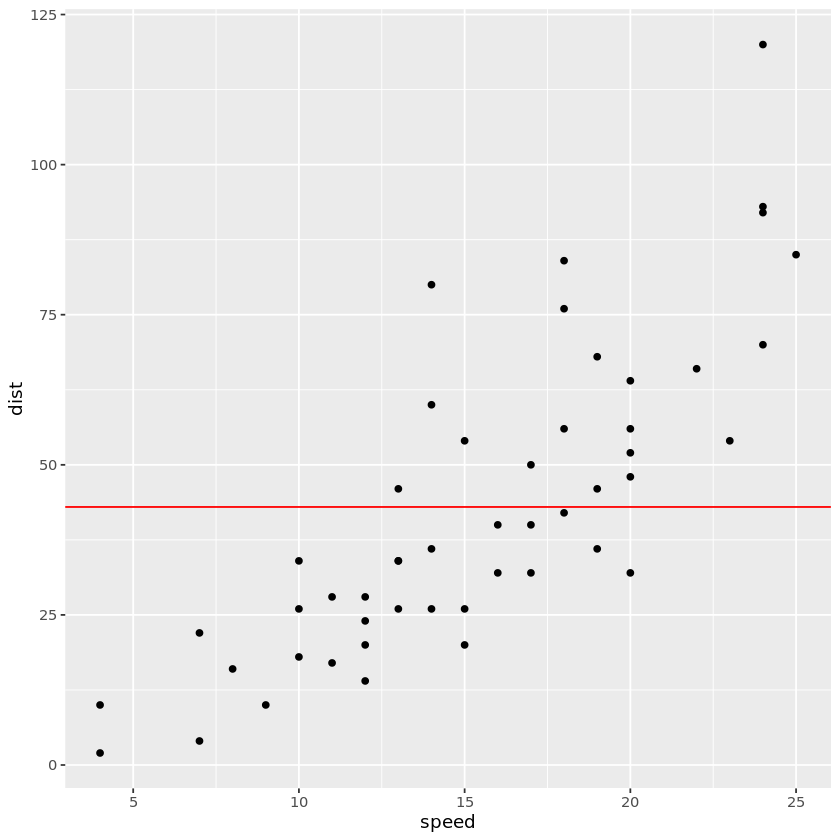

In [21]:
ggplot(cars, aes(x = speed, y = dist)) + 
    geom_point() + 
    geom_hline(yintercept = mean(cars$dist), 
               col = "red") 

Another reason that using the test data to measure the performance of the model is because of **overfitting**. These differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

#### How to prevent overfitting?
- Reduce model complexity
- Training with more data
- Cross-validation
- Regularization

Let's take a look at an example. We use 8th degree polynomial here with `poly(x, 8)` to fit the "car" dataset.


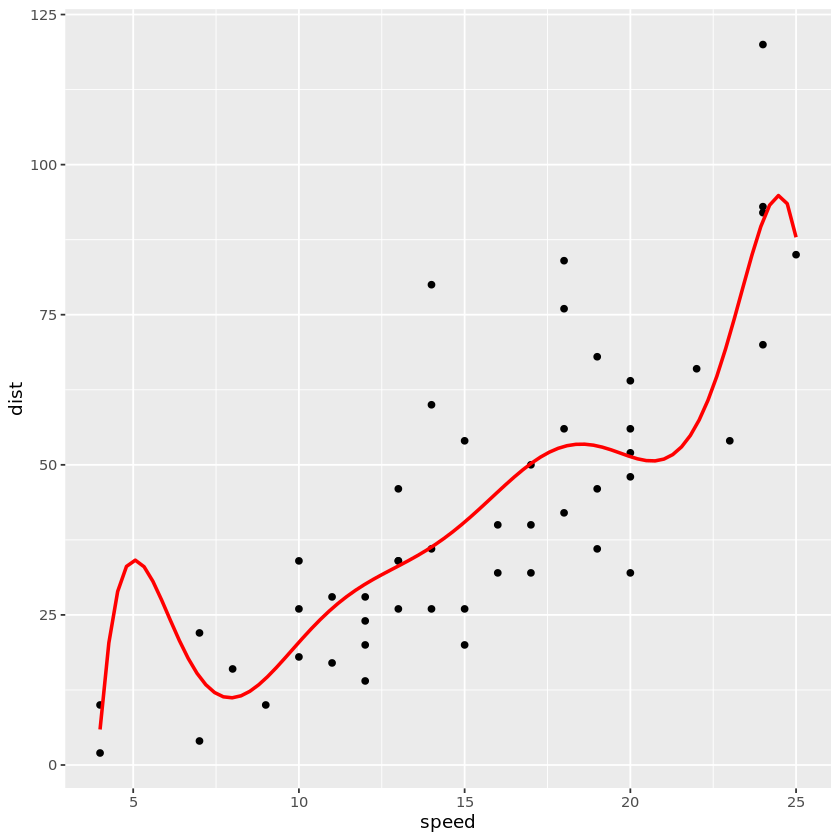

In [22]:
ggplot(cars, aes(x = speed, y = dist)) + 
    geom_point() + 
    geom_smooth(method = "lm", 
                formula = y ~ poly(x, 8), 
                col = "red", se = FALSE) 

The model is fitting to the points in the top right. If this model received new speeds, it may not be able to predict accurate distances.


Going back to the example with the "cars" dataset, you can reduce the complexity of the model. In the previous overfitting example, a polynomial model of 8 degrees was used. Instead, you can use a polynomial of degree 1 or a simple linear regression model. In R, you can set the formula to y over x. In this example, we demonstrated how you can prevent overfitting and underfitting models by changing the model complexity.


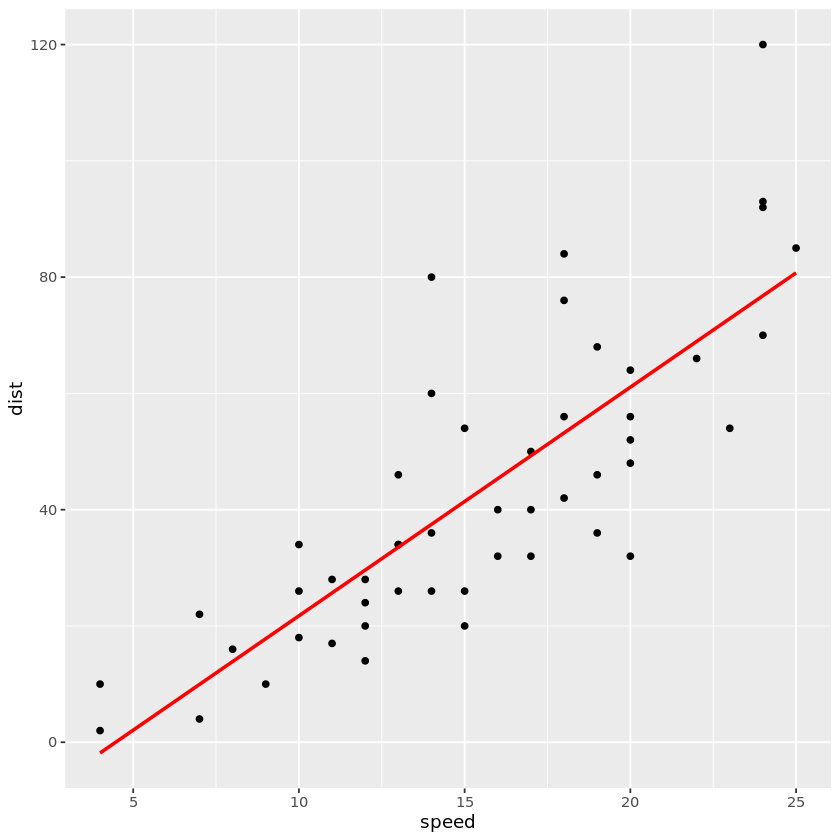

In [23]:
ggplot(cars, aes(x = speed, y = dist)) + 
    geom_point() + 
    geom_smooth(method = "lm", 
                formula = y ~ x, 
                col = "red", 
                se = FALSE) 

<a class="anchor" id="ridge"></a>

## 3. Regularization

Regularization is a way to handle the problem of overfitting. It is a technique you can use to reduce the complexity of the model by adding a penalty on the different parameters of the model. After it is applied, the model will be¬†less likely to fit the noise¬†of the training data and will improve the generalization abilities of the model. So, regularization is a way of *avoiding overfitting* by restricting the magnitude of model coefficients.

There are a few methods of regularizing linear models including 
- Ridge (L2) regularization
- Lasso (L1) regularization
- Elastic net (mix of L1 and L2) regularization


### Ridge (L2) regularization
First, create a `recipe()` that includes the model formula. You could preprocess the data more in this step, but the data here is already preprocessed. The dot `.` in the formula is a special character that tells R to use all the variables in train_data.


In [24]:
flight_recipe <-
  recipe(ArrDelayMinutes ~ ., data = train_data)

Next, use the `linear_reg()` function from the tidymodels library to specify the model.

‚Äúpenalty‚Äù is the value of lambda. ‚Äùmixture‚Äù is the proportion of L1 penalty. For ridge regression, specify **`mixture = 0`**. This means there is no L1 penalty and only the L2 penalty is used. For lasso regression, you would use **`mixture = 1`**.


In [25]:
ridge_spec <- linear_reg(penalty = 0.1, mixture = 0) %>%
  set_engine("glmnet")

Next, create a workflow object so you can more conveniently combine pre-processing, modeling, and post-processing requests.


In [26]:
ridge_wf <- workflow() %>%
  add_recipe(flight_recipe)

Finally, add the ridge model and fit the model.


In [27]:
ridge_fit <- ridge_wf %>%
  add_model(ridge_spec) %>%
  fit(data = train_data)

To view the result of the fitted ridge regression model, use the `pull_workflow_fit()` function. 


In [28]:
ridge_fit %>%
  pull_workflow_fit() %>%
  tidy()

term              step estimate      lambda   dev.ratio   
1   (Intercept)       1     1.247386e+01 34182.46 3.071080e-36
2   DepDelayMinutes   1     9.745216e-37 34182.46 3.071080e-36
3   CarrierDelay      1     1.002458e-36 34182.46 3.071080e-36
4   WeatherDelay      1     1.993863e-36 34182.46 3.071080e-36
5   NASDelay          1     1.020732e-36 34182.46 3.071080e-36
6   SecurityDelay     1     9.333620e-37 34182.46 3.071080e-36
7   LateAircraftDelay 1     1.110034e-36 34182.46 3.071080e-36
8   DayOfWeek         1     7.290093e-37 34182.46 3.071080e-36
9   Month             1    -2.677597e-37 34182.46 3.071080e-36
10  (Intercept)       2     1.245183e+01 31145.79 3.617542e-03
11  DepDelayMinutes   2     1.149347e-03 31145.79 3.617542e-03
12  CarrierDelay      2     1.181869e-03 31145.79 3.617542e-03
13  WeatherDelay      2     2.350366e-03 31145.79 3.617542e-03
14  NASDelay          2     1.203898e-03 31145.79 3.617542e-03
15  SecurityDelay     2     1.100325e-03 31145.79 3.617542e-03
16  LateAircraftDelay 2     1.308528e-03 31145.79 3.617542e-03
17  DayOfWeek         2     8.596155e-04 31145.79 3.617542e-03
18  Month             2    -3.158348e-04 31145.79 3.617542e-03
19  (Intercept)       3     1.244969e+01 28378.88 3.968965e-03
20  DepDelayMinutes   3     1.261151e-03 28378.88 3.968965e-03
21  CarrierDelay      3     1.296792e-03 28378.88 3.968965e-03
22  WeatherDelay      3     2.578874e-03 28378.88 3.968965e-03
23  NASDelay          3     1.321015e-03 28378.88 3.968965e-03
24  SecurityDelay     3     1.207309e-03 28378.88 3.968965e-03
25  LateAircraftDelay 3     1.435748e-03 28378.88 3.968965e-03
26  DayOfWeek         3     9.432171e-04 28378.88 3.968965e-03
27  Month             3    -3.465623e-04 28378.88 3.968965e-03
28  (Intercept)       4     1.244734e+01 25857.78 4.354391e-03
29  DepDelayMinutes   4     1.383804e-03 25857.78 4.354391e-03
30  CarrierDelay      4     1.422857e-03 25857.78 4.354391e-03
‚ãÆ   ‚ãÆ                 ‚ãÆ    ‚ãÆ             ‚ãÆ        ‚ãÆ           
871 LateAircraftDelay  97   0.2038636    4.518721 0.8574056   
872 DayOfWeek          97   0.2209971    4.518721 0.8574056   
873 Month              97  -0.1178589    4.518721 0.8574056   
874 (Intercept)        98   2.5844502    4.117290 0.8589525   
875 DepDelayMinutes    98   0.7117772    4.117290 0.8589525   
876 CarrierDelay       98   0.2106362    4.117290 0.8589525   
877 WeatherDelay       98   0.5211904    4.117290 0.8589525   
878 NASDelay           98   0.4895922    4.117290 0.8589525   
879 SecurityDelay      98   0.1374077    4.117290 0.8589525   
880 LateAircraftDelay  98   0.1937733    4.117290 0.8589525   
881 DayOfWeek          98   0.2157662    4.117290 0.8589525   
882 Month              98  -0.1165710    4.117290 0.8589525   
883 (Intercept)        99   2.5155747    3.751521 0.8603442   
884 DepDelayMinutes    99   0.7235344    3.751521 0.8603442   
885 CarrierDelay       99   0.2013027    3.751521 0.8603442   
886 WeatherDelay       99   0.5153878    3.751521 0.8603442   
887 NASDelay           99   0.4881327    3.751521 0.8603442   
888 SecurityDelay      99   0.1266949    3.751521 0.8603442   
889 LateAircraftDelay  99   0.1837495    3.751521 0.8603442   
890 DayOfWeek          99   0.2104838    3.751521 0.8603442   
891 Month              99  -0.1152240    3.751521 0.8603442   
892 (Intercept)       100   2.4509426    3.418246 0.8615927   
893 DepDelayMinutes   100   0.7348873    3.418246 0.8615927   
894 CarrierDelay      100   0.1920394    3.418246 0.8615927   
895 WeatherDelay      100   0.5097080    3.418246 0.8615927   
896 NASDelay          100   0.4864782    3.418246 0.8615927   
897 SecurityDelay     100   0.1161025    3.418246 0.8615927   
898 LateAircraftDelay 100   0.1738491    3.418246 0.8615927   
899 DayOfWeek         100   0.2051912    3.418246 0.8615927   
900 Month             100  -0.1138345    3.418246 0.8615927

There are two results columns. The estimate column contains the estimates of the coefficients learned by the model. Penalty contains the value of lambda, which in this example is 0.1.


### Lasso (L1) regularization

Similarly, here is the code for lasso regression.


### Elastic Net (L1 and L2) Regularization

Moreover, here is the code for elastic net regularization. Like mentioned before, `mixture` is the proportion of L1 penalty used. Since elastic net uses a combination of L1 and L2 regularization, then when `mixture` is set to a value between 0 and 1 (not including 0 and 1) then it is considered elastic net regularization. In this example, it uses less L1 penalty than L2.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4): </h1>

Perform elastic net regression with "mixture = 0.5" and "penalty = 0.2" using all features (variables) in the training data, and then output the result of the fitted regression model.
</div>


In [29]:
# Write your code below and press Shift+Enter to execute 
flight_recipe <-
  recipe(ArrDelayMinutes ~ ., data = train_data)

el_spec <- linear_reg(penalty = 0.5, mixture = 0.2) %>%
  set_engine("glmnet")

el_wf <- workflow() %>%
  add_recipe(flight_recipe)

el_fit <- el_wf %>%
  add_model(el_spec) %>%
  fit(data = train_data)

el_fit %>%
  pull_workflow_fit() %>%
  tidy()

term              step estimate    lambda    dev.ratio 
1   (Intercept)        1   12.47385621 170.91232 0.00000000
2   (Intercept)        2   12.26768725 155.72894 0.03416364
3   DepDelayMinutes    2    0.01969996 155.72894 0.03416364
4   (Intercept)        3   12.05089563 141.89441 0.06932733
5   DepDelayMinutes    3    0.04041493 141.89441 0.06932733
6   (Intercept)        4   11.82364884 129.28890 0.10535029
7   DepDelayMinutes    4    0.06212893 129.28890 0.10535029
8   (Intercept)        5   11.58622549 117.80323 0.14207178
9   DepDelayMinutes    5    0.08481532 117.80323 0.14207178
10  (Intercept)        6   11.33902143 107.33792 0.17931280
11  DepDelayMinutes    6    0.10843628 107.33792 0.17931280
12  (Intercept)        7   11.07203897  97.80231 0.22268837
13  DepDelayMinutes    7    0.13100524  97.80231 0.22268837
14  CarrierDelay       7    0.01238228  97.80231 0.22268837
15  (Intercept)        8   10.79520283  89.11383 0.26754997
16  DepDelayMinutes    8    0.15329354  89.11383 0.26754997
17  CarrierDelay       8    0.02990879  89.11383 0.26754997
18  (Intercept)        9   10.51459603  81.19720 0.31093868
19  DepDelayMinutes    9    0.17604215  81.19720 0.31093868
20  CarrierDelay       9    0.04701435  81.19720 0.31093868
21  (Intercept)       10   10.23116241  73.98386 0.35266286
22  DepDelayMinutes   10    0.19919197  73.98386 0.35266286
23  CarrierDelay      10    0.06356810  73.98386 0.35266286
24  (Intercept)       11    9.94586039  67.41134 0.39256038
25  DepDelayMinutes   11    0.22268208  67.41134 0.39256038
26  CarrierDelay      11    0.07944104  67.41134 0.39256038
27  (Intercept)       12    9.65964645  61.42270 0.43050116
28  DepDelayMinutes   12    0.24645070  61.42270 0.43050116
29  CarrierDelay      12    0.09450844  61.42270 0.43050116
30  (Intercept)       13    9.33152881  55.96608 0.46929473
‚ãÆ   ‚ãÆ                 ‚ãÆ    ‚ãÆ           ‚ãÆ         ‚ãÆ         
399 LateAircraftDelay 71    0.01322538 0.2537994 0.8704391 
400 DayOfWeek         71    0.08921531 0.2537994 0.8704391 
401 Month             71   -0.07346837 0.2537994 0.8704391 
402 (Intercept)       72    1.71328982 0.2312525 0.8704513 
403 DepDelayMinutes   72    0.89607973 0.2312525 0.8704513 
404 CarrierDelay      72    0.03866133 0.2312525 0.8704513 
405 WeatherDelay      72    0.39588382 0.2312525 0.8704513 
406 NASDelay          72    0.44009044 0.2312525 0.8704513 
407 SecurityDelay     72   -0.04160024 0.2312525 0.8704513 
408 LateAircraftDelay 72    0.01229143 0.2312525 0.8704513 
409 DayOfWeek         72    0.09075233 0.2312525 0.8704513 
410 Month             72   -0.07442037 0.2312525 0.8704513 
411 (Intercept)       73    1.70591922 0.2107087 0.8704616 
412 DepDelayMinutes   73    0.89721703 0.2107087 0.8704616 
413 CarrierDelay      73    0.03766031 0.2107087 0.8704616 
414 WeatherDelay      73    0.39789686 0.2107087 0.8704616 
415 NASDelay          73    0.43992670 0.2107087 0.8704616 
416 SecurityDelay     73   -0.04399248 0.2107087 0.8704616 
417 LateAircraftDelay 73    0.01142349 0.2107087 0.8704616 
418 DayOfWeek         73    0.09214362 0.2107087 0.8704616 
419 Month             73   -0.07528481 0.2107087 0.8704616 
420 (Intercept)       74    1.69917676 0.1919899 0.8704701 
421 DepDelayMinutes   74    0.89826120 0.1919899 0.8704701 
422 CarrierDelay      74    0.03673924 0.1919899 0.8704701 
423 WeatherDelay      74    0.39972979 0.1919899 0.8704701 
424 NASDelay          74    0.43977335 0.1919899 0.8704701 
425 SecurityDelay     74   -0.04618294 0.1919899 0.8704701 
426 LateAircraftDelay 74    0.01062380 0.1919899 0.8704701 
427 DayOfWeek         74    0.09340708 0.1919899 0.8704701 
428 Month             74   -0.07607116 0.1919899 0.8704701

<details>
    <summary>Click here for the solution.</summary>

```r
flight_recipe <-
  recipe(ArrDelayMinutes ~ ., data = train_data)

el_spec <- linear_reg(penalty = 0.5, mixture = 0.2) %>%
  set_engine("glmnet")

el_wf <- workflow() %>%
  add_recipe(flight_recipe)

el_fit <- el_wf %>%
  add_model(el_spec) %>%
  fit(data = train_data)

el_fit %>%
  pull_workflow_fit() %>%
  tidy()
```

</details>


### Comparing Regularization Types

Now that you know more about regularization, it is also good to understand when you would use a techinque over the other. 

* **Lasso (L1)**: 
    * Pros: Lasso is primarily used for variable selection, that is, reducing the number of variables/features used in a model by shrinking the coefficients to zero. You would use this if you have many variables and think just a select few would will be useful in a final model. 
    * Cons: The downside of Lasso is that its variable selection is unstable, as in, for correlated variables it will arbitrarily select one. Additionally, if the number of data point (n) is less than the number of features (p), then Lasso can select at most n of the features.

* **Ridge (L2)**: 
    * Pros: If you don‚Äôt want to reduce the number of variables, you can use this. Ridge also works well when there is multicollinearity in the features because it reduces the variance while increasing bias.
    * Cons: Will not reduce the number of variables if that is your goal. Also, the bias in the model may be high.

* **Elastic net (L1/L2)**: 
    * Pros: Elastic net combines the benefits of Lasso and Ridge. It solves some of the issues that Lasso has when doing variable selection because it works well when the variables are highly correlated and it can work when the number of variables is greater than the number of samples.
    * Cons: May be computationally more expensive than Lasso or Ridge because it computes both L1 and L2 penalties.


<a class="anchor" id="grid"></a>
## Part 4: Grid Search

The goal of grid search is to find the values of the hyperparameters that results in the best model. This is known as tuning hyperparameters. Hyperparameters are parameters that are not derived from training the model. For example: ùúÜ (or lambda) in ridge/lasso is a hyperparameter.

Grid search takes a list of values for each hyperparameter it is tuning and iterates through each combination. It then uses every combination of parameters to produce a model. For each model, a metric like RMSE is calculated. You then determine the best value of the hyperparameters by choosing the model with the best RMSE. In R, you can use functions in tidymodels to run grid search.


First, define the lasso model. In this example, we will be tuning a lasso model so `mixture = 1`. We will tune lambda, which is `penalty` in the function.


In [30]:
tune_spec <- linear_reg(penalty = tune(), mixture = 1) %>% 
  set_engine("glmnet")

lasso_wf <- workflow() %>%
  add_recipe(flight_recipe)

Next, define cross validation to resample the data:


In [31]:
flight_cvfolds <- vfold_cv(train_data)

Now, you can set up the grid using `grid_regular()`. The `levels` are how many values to use and in `penalty()` you can specify the range of values to use. By default, the range values are inverse log transformed. This means that $-3$ is really $10^{-3}$ and $0.3$ is really $10^{0.3}$.


In [32]:
lambda_grid <- grid_regular(levels = 50,
  penalty(range = c(-3, 0.3)))

To tune the grid, use `tune_grid()` and include the lambda grid just specified.


In [33]:
lasso_grid <- tune_grid(
    lasso_wf %>% add_model(tune_spec), 
    resamples = flight_cvfolds, 
    grid = lambda_grid)

Finally, to view best results:


In [34]:
show_best(lasso_grid, metric = "rmse")

penalty  .metric .estimator mean     n  std_err 
1 1.708650 rmse    standard   13.39759 10 1.544575
2 1.463208 rmse    standard   13.39985 10 1.562461
3 1.253023 rmse    standard   13.40856 10 1.578315
4 1.995262 rmse    standard   13.42091 10 1.539151
5 1.073031 rmse    standard   13.42110 10 1.592327

From the table and using RMSE as the metric, using lambda (penalty) equal to 1.46 gives the best result.

Additionally, to visualize the RMSE results:


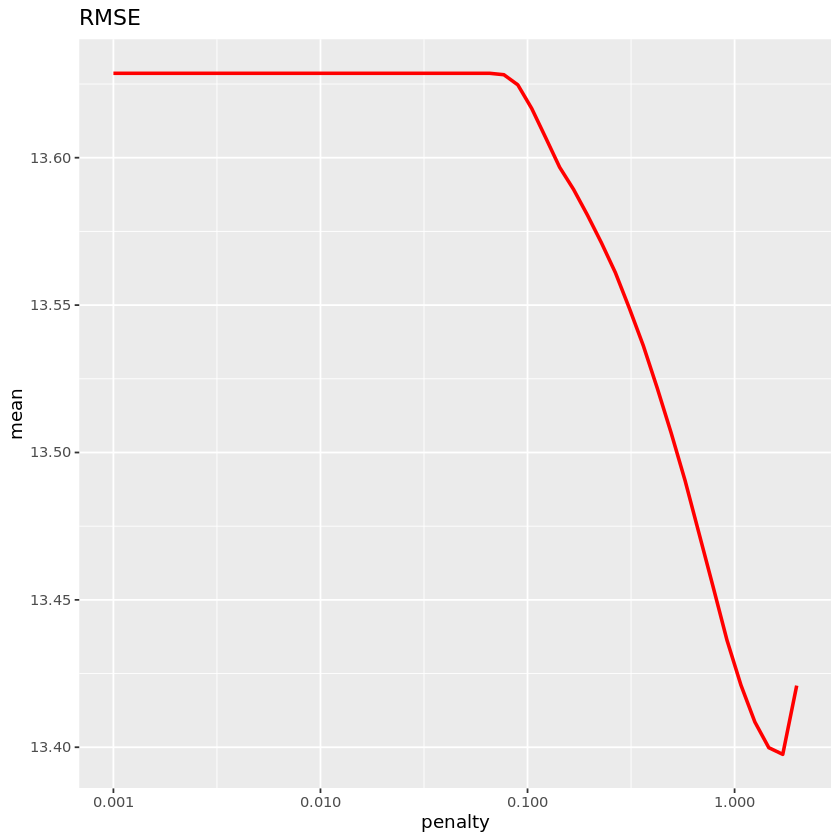

In [35]:
lasso_grid %>%
  collect_metrics() %>%
  filter(.metric == "rmse") %>%
  ggplot(aes(penalty, mean)) +
  geom_line(size=1, color="red") +
  scale_x_log10() +
  ggtitle("RMSE")

The dip in the RMSE graph corresponds to the best value for lambda. So again, we see that using lambda (penalty) of about 1.46 gives the best result.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>
Perform a grid search for the lambda (penalty) parameter on ridge regression, then find the best values of the parameter.
</div>


In [36]:
# Write your code below and press Shift+Enter to execute 
tune_spec <- linear_reg(
             penalty = tune(), 
             mixture = 0) %>% 
  set_engine("glmnet")

ridge_grid <- tune_grid(ridge_wf %>% 
    add_model(tune_spec), 
    resamples = flight_cvfolds, 
    grid = lambda_grid)

show_best(ridge_grid, metric = "rmse")

penalty     .metric .estimator mean     n  std_err 
1 0.001000000 rmse    standard   13.36074 10 2.063548
2 0.001167742 rmse    standard   13.36074 10 2.063548
3 0.001363622 rmse    standard   13.36074 10 2.063548
4 0.001592358 rmse    standard   13.36074 10 2.063548
5 0.001859464 rmse    standard   13.36074 10 2.063548

<details>
    <summary>Click here for the solution.</summary>

```r
tune_spec <- linear_reg(
             penalty = tune(), 
             mixture = 0) %>% 
  set_engine("glmnet")

ridge_grid <- tune_grid(ridge_wf %>% 
    add_model(tune_spec), 
    resamples = flight_cvfolds, 
    grid = lambda_grid)

show_best(ridge_grid, metric = "rmse")
```

</details>


<h1>Thank you for completing this notebook!</h1>

Checkout the documentation here: https://www.tidymodels.org/.


<h3>About the Authors:</h3>

This notebook was written by <a href="https://www.linkedin.com/in/yiwen-li-47a019119/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork926-2023-01-01">Yiwen Li</a> and <a href="https://www.linkedin.com/in/gabrieladequeiroz/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork926-2023-01-01">Gabriela de Queiroz</a>.

<p><a href="https://www.linkedin.com/in/yiwen-li-47a019119/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork926-2023-01-01">Yiwen Li</a> has approximately three year experiences in big tech industry. Currently, she is a developer advocate, a data scientist, a product manager at IBM, where she designs and develops data science solutions and Machine Learning models to solve real world problems. She has delivered talks this year in JupyterCon, PyCon, Pyjamas, CrowdCast.ai, Global AI on Tour 2020 and Belpy 2021 with hundreds of attendants per talk. 
    
<a href="https://www.linkedin.com/in/gabrieladequeiroz/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork926-2023-01-01">Gabriela de Queiroz</a> is a Sr. Engineering & Data Science Manager at IBM where she manages and leads a team of developers working on Data & AI Open Source projects. She works to democratize AI by building tools and launching new open source projects.
She is the founder of AI Inclusive, a global organization that is helping increase the representation and participation of gender minorities in Artificial Intelligence. She is also the founder of R-Ladies, a worldwide organization for promoting diversity in the R community with more than 190 chapters in 50+ countries.
She has worked in several startups and where she built teams, developed statistical models, and employed a variety of techniques to derive insights and drive data-centric decisions


<hr>
<p>Copyright &copy; 2021 IBM Corporation. All rights reserved.</p>
